In [1]:
%pylab inline
import pandas as pd    
import numpy as np
import pylab as pl

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Get data from CSV
df = pd.read_csv("/Users/amydenise/dssg/data-challenges/BuildingInspections/data/Building_Violations_50000_features_and_labels.csv")

/Users/amydenise/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
#pulling out only failed and passed rows
df = df[(df["inspection_status"] == "FAILED") | (df["inspection_status"] == "PASSED")]

In [4]:
#list of features
features = ["boiler", "conservation", "construction_equipment", u'demolition', u'electrical', u'elevator', u'iron', u'new_construction', u'plumbing', u'refrigeration', u'signs', u'special_inspection_program', u'special_task_force', u'ventilation', u'water', u'complied', u'no_entry']

In [5]:
print features

['boiler', 'conservation', 'construction_equipment', u'demolition', u'electrical', u'elevator', u'iron', u'new_construction', u'plumbing', u'refrigeration', u'signs', u'special_inspection_program', u'special_task_force', u'ventilation', u'water', u'complied', u'no_entry']


In [6]:
label = ["inspection_status"]

In [7]:
df[label].head()

,inspection_status
0,FAILED
1,FAILED
2,FAILED
3,FAILED
4,FAILED


In [8]:
#Converting to binary indicator
label = pd.get_dummies(df["inspection_status"])["FAILED"]

In [9]:
#Attaching label to dataframe
df["label"] = label

In [10]:
#converting type to date for multiple columns (for sorting)
for c in ["violation_last_modified_date", "violation_date", "violation_status_date"]:
    df[c] = pd.to_datetime(df[c])

In [11]:
#sort by data
df = df.sort("violation_date")

In [12]:
#Take first 30,000 in time as training
train = df.iloc[1:30000,]

In [13]:
train[features]

,boiler,conservation,construction_equipment,demolition,electrical,elevator,iron,new_construction,plumbing,refrigeration,signs,special_inspection_program,special_task_force,ventilation,water,complied,no_entry
44787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44788,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44789,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44790,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44795,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44792,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44794,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44791,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
44759,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [14]:
#Take last portion as test
test = df.iloc[30001:,]

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [16]:
#near neighbor classifier
clf = KNeighborsClassifier(n_neighbors=15)

In [17]:
#Fit the model
clf.fit(train[features], train["label"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=15, p=2, weights='uniform')

In [18]:
#predict with model (classes)
clf.predict(test[features])

array([ 1.,  0.,  1., ...,  1.,  1.,  1.])

In [19]:
#predict with model (and probabilities!)
clf.predict_proba(test[features])

array([[ 0.        ,  1.        ],
       [ 0.53333333,  0.46666667],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ]])

In [20]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [21]:
#confusion matrix
confusion_matrix(test['label'], clf.predict(test[features]))

array([[ 1844,   103],
       [ 1749, 11100]])

In [22]:
#saving to avoid re-computing
prediction = clf.predict(test[features])
pred_probs = clf.predict_proba(test[features])

In [23]:
#classification report
print classification_report(test['label'], prediction, labels=[0, 1])

             precision    recall  f1-score   support

          0       0.51      0.95      0.67      1947
          1       0.99      0.86      0.92     12849

avg / total       0.93      0.87      0.89     14796



In [24]:
#ROC curve function
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(test['label'], probs)
    roc_auc = auc(fpr, tpr)
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.05])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(name)
    pl.legend(loc="lower right")
    pl.show()

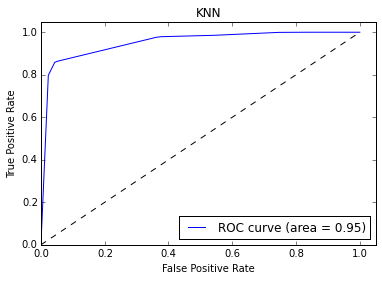

In [25]:
#ROC Curve
plot_roc("KNN", pred_probs[::,1])